In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']=(6,6)
#plt.rcParams['font.weight']='bold'
#plt.rcParams['axes.labelweight']='bold'
#plt.rcParams['lines.linewidth']=1.5
#plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.meshing import load_gs_mesh
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

from omfit_classes.omfit_eqdsk import boundaryShape

In [2]:
mygs = TokaMaker()
mesh_pts,mesh_lc,mesh_reg,coil_dict,cond_dict = load_gs_mesh('nextstep_mesh.h5')
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict,coil_dict=coil_dict)
mygs.setup(order=2,F0=1*3)

coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Constrain CS current
coil_reg_mat[0,0] = 1
coil_reg_mat[1,1] = 1
coil_reg_mat[1,0] = -1
coil_reg_mat[2,2] = 1
coil_reg_mat[2,1] = -1

targets[0] = -3E6

coil_weights[:3] = 5

#Enforce up/down symmetry in PF coils
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
coil_reg_mat[4,8] = -1
coil_reg_mat[5,5] = 1
coil_reg_mat[5,9] = -1
coil_reg_mat[6,6] = 1
coil_reg_mat[6,10] = -1

mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

#Set upper bound on coil currents
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11

#Set upper bounds on divertor coils
coil_bounds[-5:-1, 0] = -122448.979592
coil_bounds[-5:-1, 1] = 122448.979592

mygs.set_coil_bounds(coil_bounds)

# Define shape of P' anf FF' profiles
n_sample = 40
psi_sample = np.linspace(0.0,1.0,n_sample)
# Set F*F' profile
alpha = 2
gamma = 1.25
ffp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
# Set P' profile
alpha = 2
gamma = 1.25
pp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

# set global targets
Ip_target = 0.75E6
mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          aba6d8f
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  5.098E+00
    # of points  =    5677
    # of edges   =   16908
    # of cells   =   11232
    # of boundary points =     120
    # of boundary edges  =     120
    # of boundary cells  =     120
  Resolution statistics:
    hmin =  3.000E-03
    hrms =  3.455E-02
    hmax =  1.1

Starting non-linear GS solver
     1  6.2551E+00  3.0992E+00  1.7237E-02  1.0090E+00 -2.2362E-05 -0.0000E+00
     2  5.9152E+00  2.9637E+00  4.3072E-03  1.0085E+00 -2.7617E-05 -0.0000E+00
     3  5.8019E+00  2.9194E+00  9.6662E-04  1.0080E+00 -1.1908E-05 -0.0000E+00
     4  5.7561E+00  2.9015E+00  2.6890E-04  1.0077E+00 -3.4630E-06 -0.0000E+00
     5  5.7368E+00  2.8938E+00  1.1817E-04  1.0075E+00  8.4468E-07 -0.0000E+00
     6  5.7286E+00  2.8905E+00  6.0318E-05  1.0074E+00  2.9535E-06 -0.0000E+00
     7  5.7251E+00  2.8891E+00  3.0006E-05  1.0074E+00  3.9378E-06 -0.0000E+00
     8  5.7237E+00  2.8884E+00  1.4351E-05  1.0074E+00  4.3812E-06 -0.0000E+00
     9  5.7231E+00  2.8882E+00  6.6572E-06  1.0074E+00  4.5726E-06 -0.0000E+00
    10  5.7228E+00  2.8881E+00  3.0181E-06  1.0074E+00  4.6507E-06 -0.0000E+00
    11  5.7227E+00  2.8880E+00  1.3444E-06  1.0074E+00  4.6801E-06 -0.0000E+00
    12  5.7227E+00  2.8880E+00  5.9061E-07  1.0074E+00  4.6896E-06 -0.0000E+00
 Timing:  0.2865959992

Starting non-linear GS solver
     1  6.4720E+00  3.1386E+00  1.9743E-02  1.0193E+00 -6.1822E-05 -0.0000E+00
     2  5.9268E+00  2.9190E+00  4.5143E-03  1.0181E+00 -2.8049E-05 -0.0000E+00
     3  5.7544E+00  2.8502E+00  9.6030E-04  1.0173E+00 -6.4583E-06 -0.0000E+00
     4  5.6869E+00  2.8230E+00  3.2431E-04  1.0168E+00  5.8877E-06 -0.0000E+00
     5  5.6593E+00  2.8117E+00  1.6673E-04  1.0166E+00  1.2360E-05 -0.0000E+00
     6  5.6480E+00  2.8070E+00  8.5296E-05  1.0165E+00  1.5653E-05 -0.0000E+00
     7  5.6434E+00  2.8050E+00  4.1219E-05  1.0164E+00  1.7287E-05 -0.0000E+00
     8  5.6416E+00  2.8042E+00  1.9118E-05  1.0164E+00  1.8077E-05 -0.0000E+00
     9  5.6408E+00  2.8038E+00  8.6236E-06  1.0164E+00  1.8448E-05 -0.0000E+00
    10  5.6405E+00  2.8037E+00  3.8147E-06  1.0164E+00  1.8618E-05 -0.0000E+00
    11  5.6404E+00  2.8037E+00  1.6637E-06  1.0164E+00  1.8691E-05 -0.0000E+00
    12  5.6404E+00  2.8036E+00  7.1824E-07  1.0164E+00  1.8721E-05 -0.0000E+00
 Timing:  0.4618719993

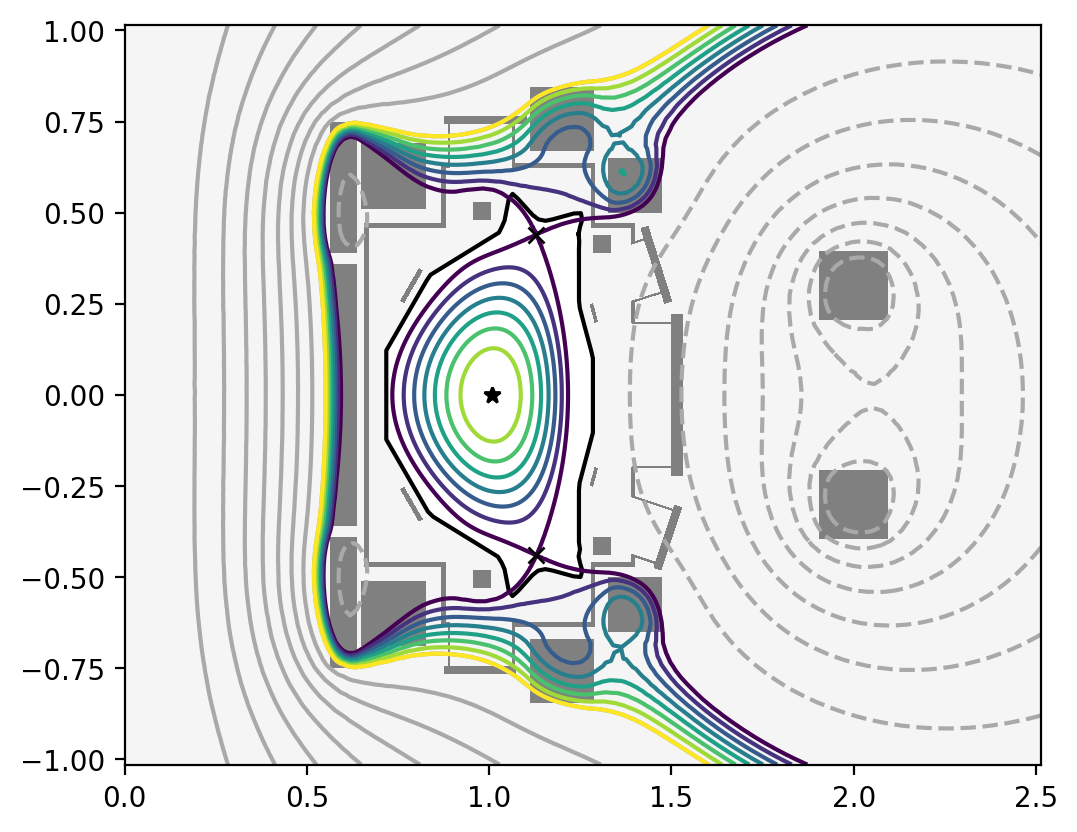

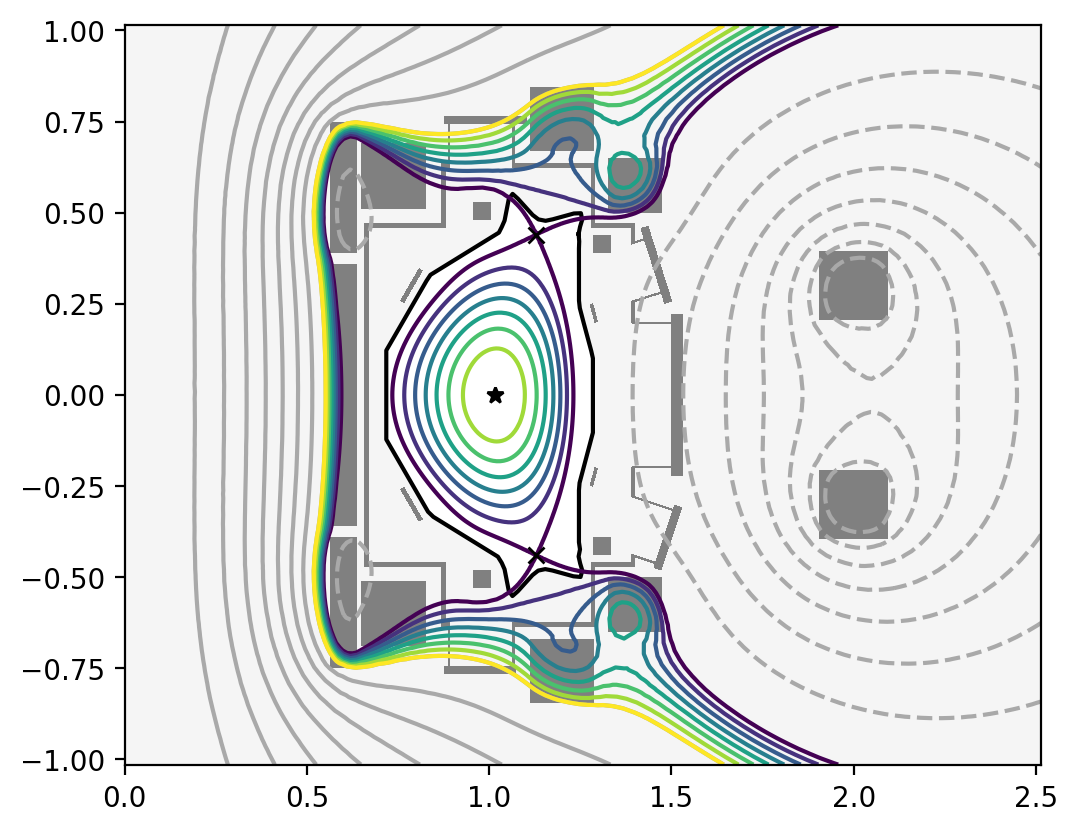

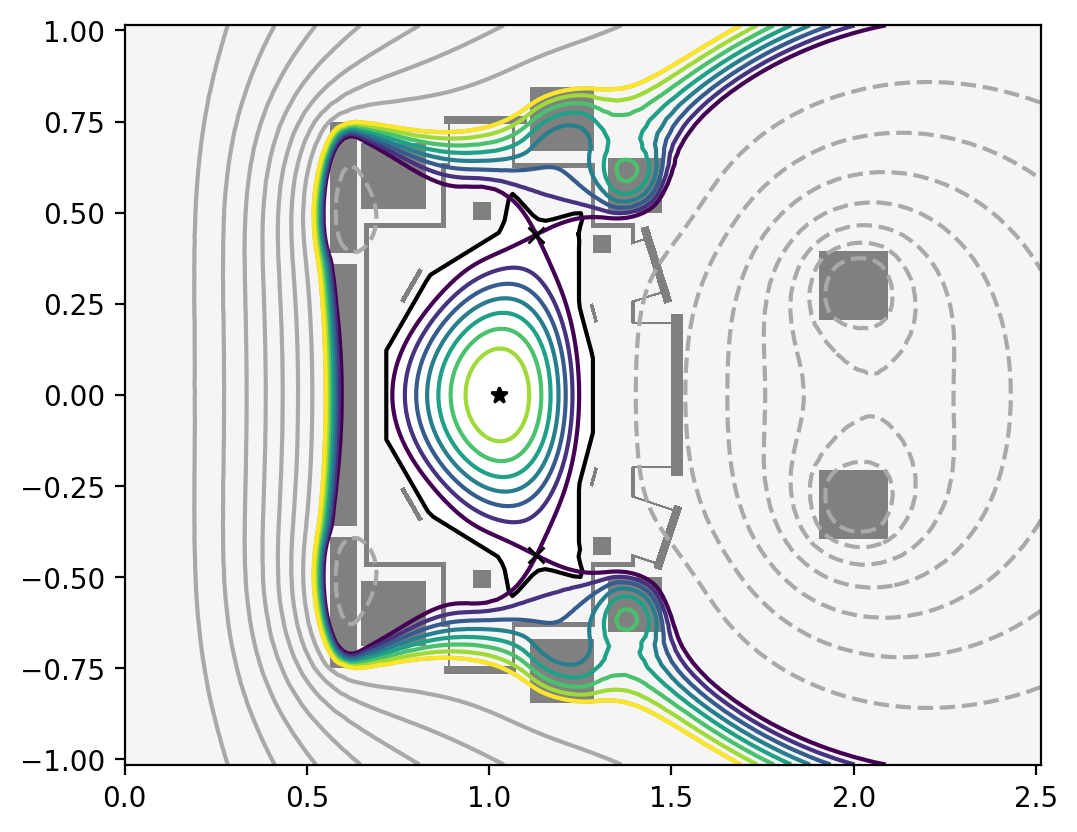

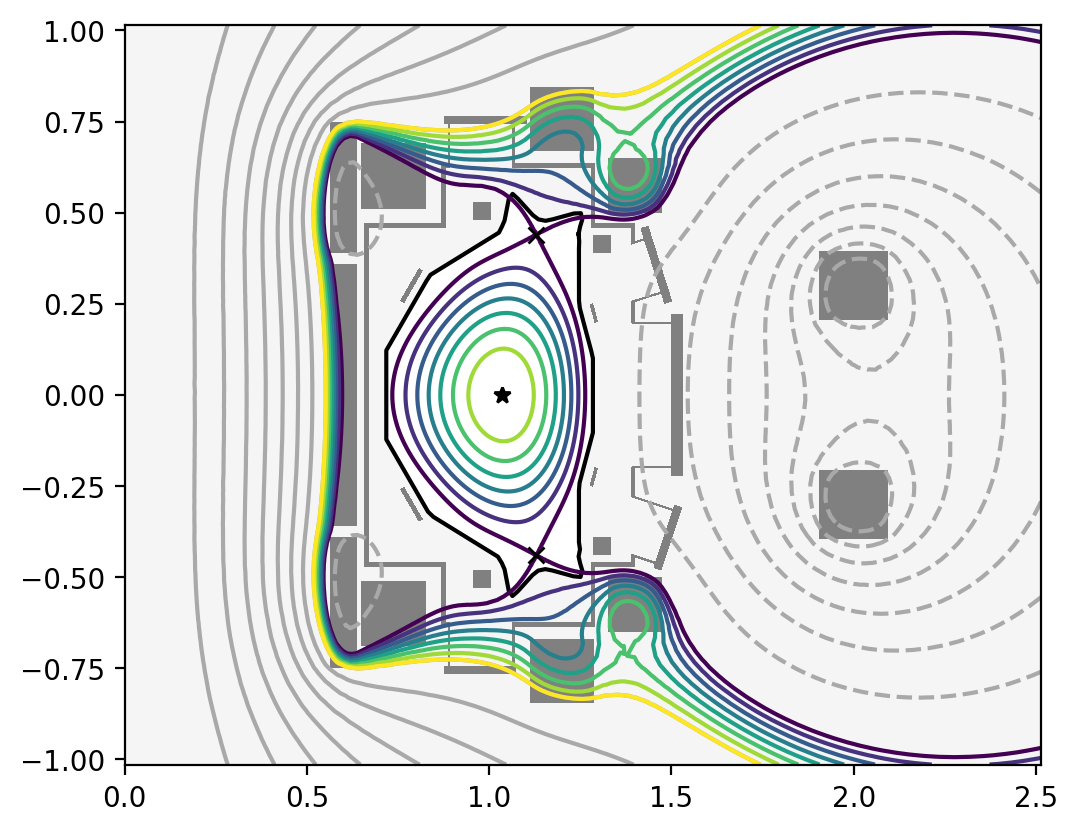

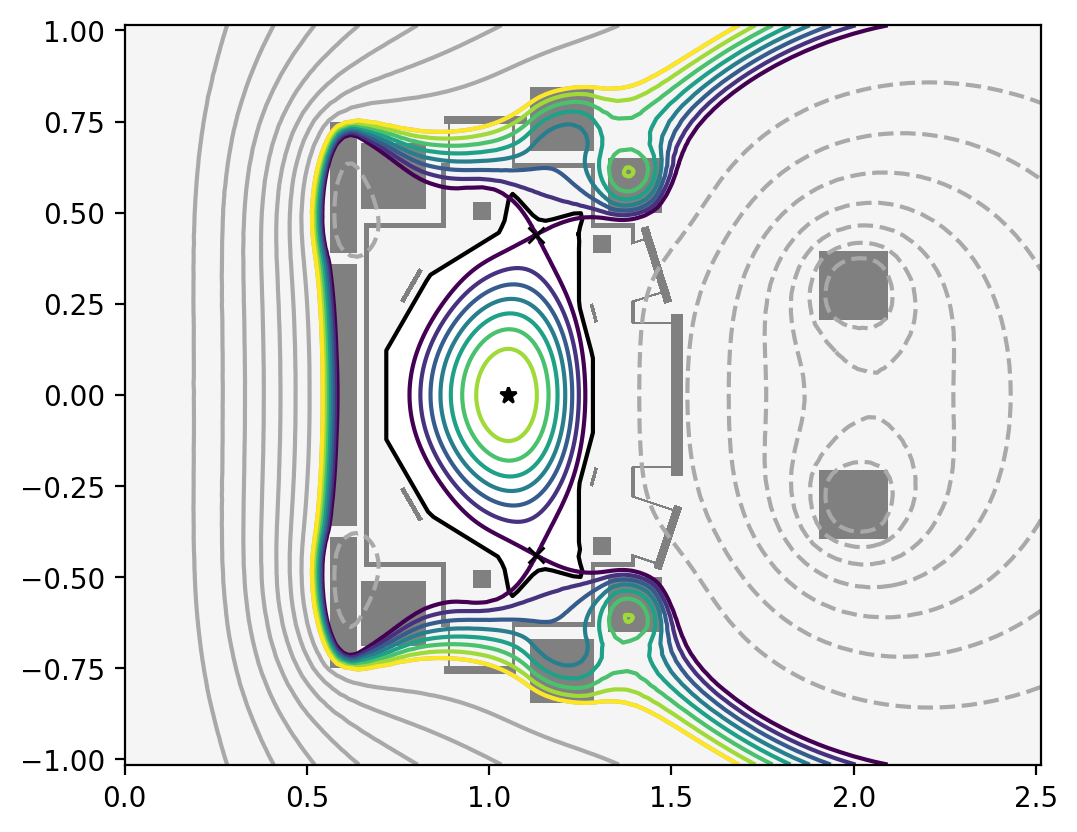

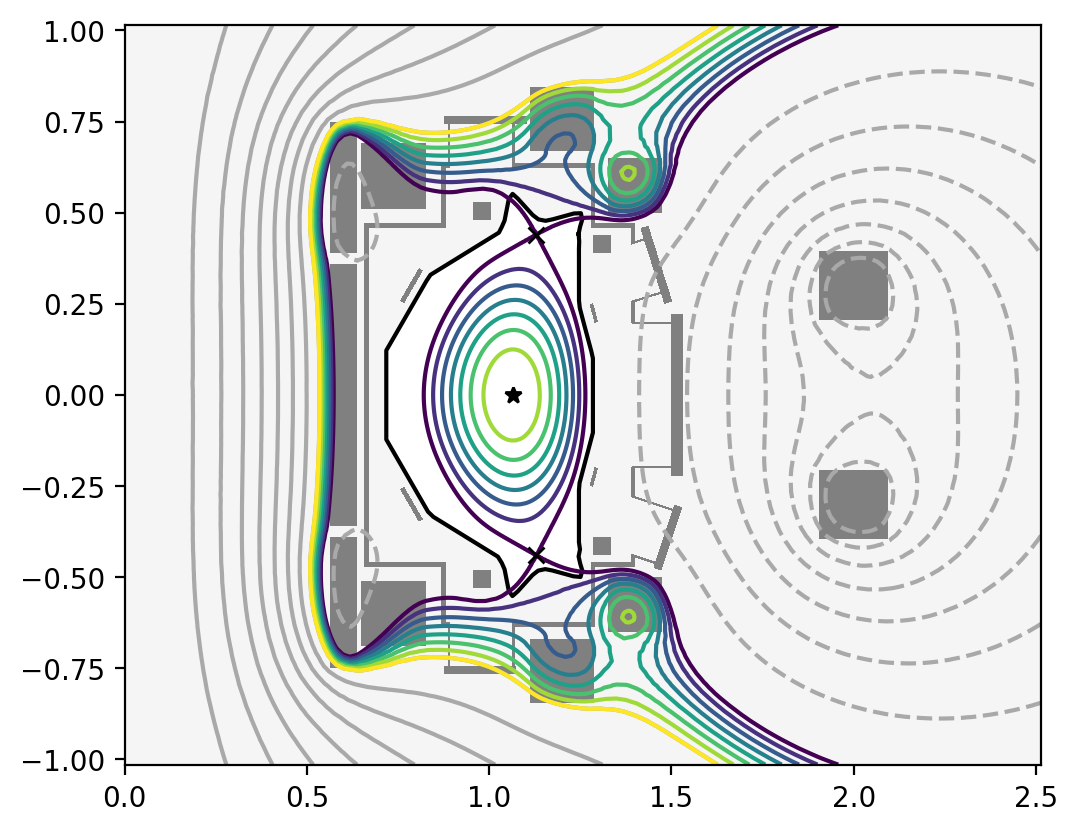

In [3]:
deltas = [-0.65, -0.6, -0.55, -0.5, -0.45, -0.4]
lcfs = []
tri = []
elong = []
for delta in deltas:
    # set boundary/saddle point/strike point targets

    d0 = -0.5
    if delta<d0:
        r, z, zeff = boundaryShape(kapu = 1.7*(1-delta)/(1-d0), kapl = 1.7*(1-delta)/(1-d0), delu = delta, dell = delta, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588*(1-d0)/(1-delta), eps = 0.2588*(1-d0)/(1-delta)/(1+0.2588*((1-d0)/(1-delta)-1)), zoffset = 0, upnull = True, lonull = True, npts = 1)
    else:
        r, z, zeff = boundaryShape(kapu = 1.7*(1+delta)/(1+d0), kapl = 1.7*(1+delta)/(1+d0), delu = delta, dell = delta, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588*(1+d0)/(1+delta), eps = 0.2588*(1+d0)/(1+delta)/(1+0.2588*(1-(1+d0)/(1+delta))), zoffset = 0, upnull = True, lonull = True, npts = 1)
    
    boundary = np.column_stack((r,z))
    boundary = np.nan_to_num(boundary)
    x_points = np.zeros((2,2))
    x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
    x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
    x_weights = 50*np.ones(2)
    mygs.set_saddles(x_points, x_weights)

    strike_ul = [1.06, 0.55]
    strike_ur = [1.255, 0.495]

    strike_ll = np.copy(strike_ul)
    strike_ll[1] = -strike_ul[1]
    strike_lr = np.copy(strike_ur)
    strike_lr[1] = -strike_ur[1]

    boundary = np.vstack((boundary, strike_ul, strike_ll, strike_lr, strike_ur))
    isoflux_weights = 50*np.ones(len(boundary))
    isoflux_weights[-4:] = 500

    mygs.set_isoflux(boundary, isoflux_weights)

    mygs.init_psi(0.68,0,0.2, 1.8,0.3)
    mygs.settings.maxits = 100
    mygs.update_settings()
    mygs.solve()

    fig, ax = plt.subplots()
    mygs.plot_machine(fig,ax)
    mygs.plot_psi(fig,ax)

    lcfs.append(mygs.trace_surf(psi = 0.999999))
    stats = mygs.get_stats()
    tri.append(np.min((stats['deltaU'], stats['deltaL'])))
    elong.append(np.max((stats['kappaU'], stats['kappaL'])))

    mygs.print_info()



    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

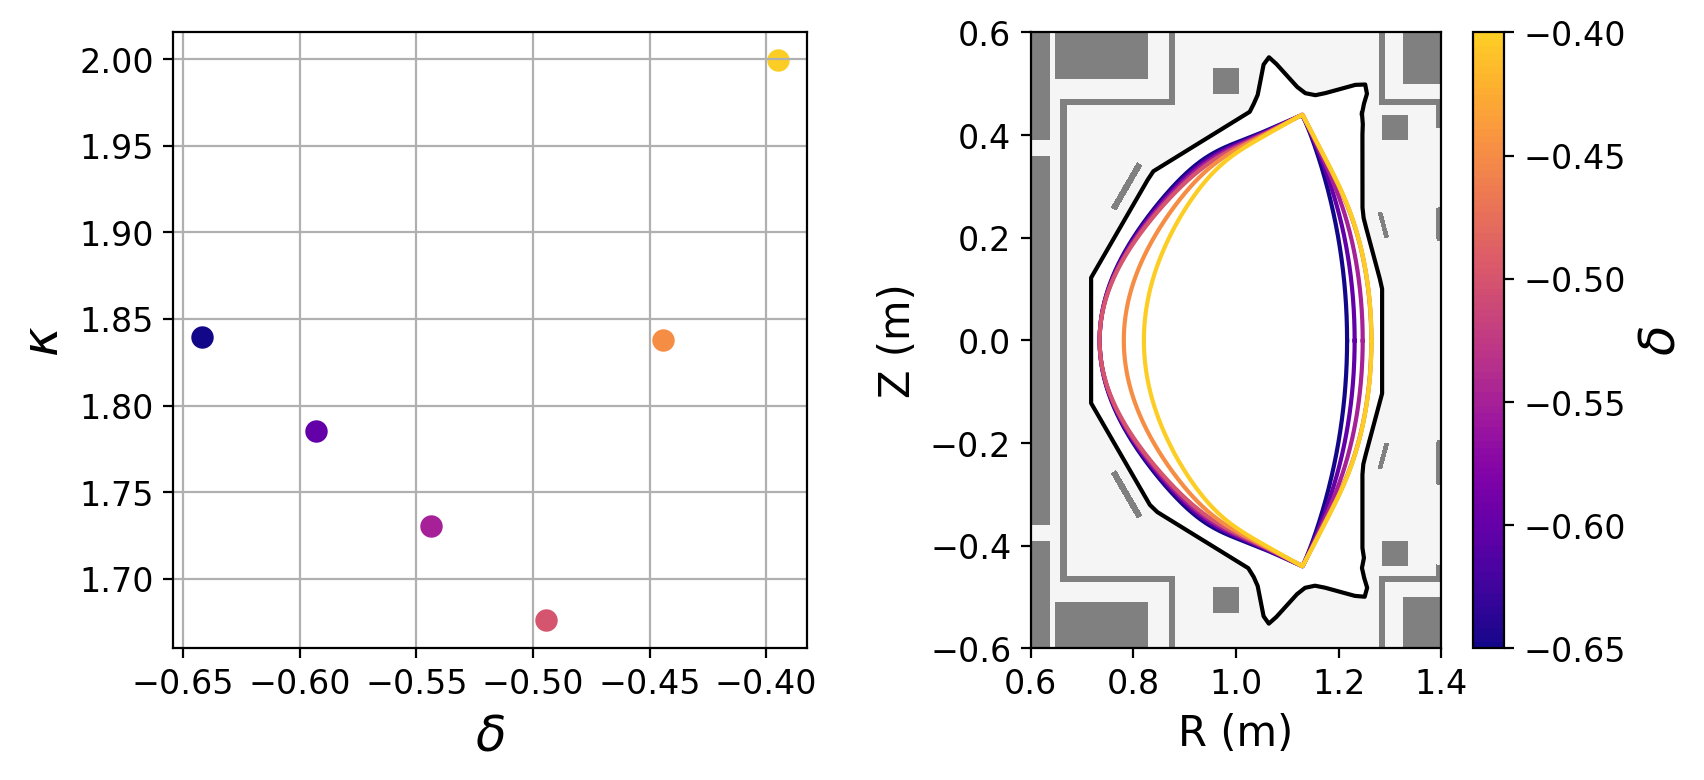

In [4]:
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

norm = plt.Normalize(np.min(deltas), np.max(deltas))
import matplotlib as mpl
cmap = mpl.cm.plasma(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[1:90,:-1])
c = cmap(norm(deltas))

fig, ax = plt.subplots(1,2, figsize = (9,4))
mygs.plot_machine(fig,ax[1])
ax[1].set_xlim([0.6,1.4])
ax[1].set_ylim([-0.6, 0.6])

for i in range(6):
    ax[0].scatter(tri[i], elong[i], c = c[i], s = 50)
    ax[1].plot(lcfs[i][:,0], lcfs[i][:,1], c = c[i])
ax[0].grid()

ax[0].set_xlabel(r'$\delta$', size = 18)
ax[0].set_ylabel(r'$\kappa$', size = 18)
ax[1].set_xlabel('R (m)', size = 15)
ax[1].set_ylabel('Z (m)', size = 15)

sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
plt.colorbar(sm, ax =ax[1]).set_label(label=r'$\delta$',size=18)
